In [1]:
import matplotlib.pyplot as plt
import pymiediff as pmd
import torch
import numpy as np

# Define parameters of coreshell particle.

In [2]:
# ======== Test Parameters ==========
N_pt_test = 1000
# N_order_test = 6

# Test Case for testing:
core_radius = 12.0  # nm
shell_radius = 50.0  # nm
core_refractiveIndex = 2.0 + 0.1j
shell_refractiveIndex = 5.0 + 0.2j
starting_wavelength = 200.0  # nm
ending_wavelength = 600.0  # nm
# ===================================

dtype = torch.complex128  # torch.complex64
device = torch.device("cpu")

k0 = 2 * torch.pi / torch.linspace(starting_wavelength, ending_wavelength, N_pt_test)

theta = torch.linspace(0.001, 2 * torch.pi - 0.001, N_pt_test, dtype=torch.double)
r_c = torch.tensor(core_radius)
r_s = torch.tensor(shell_radius)
n_c = torch.tensor(core_refractiveIndex)
n_s = torch.tensor(shell_refractiveIndex)

# Cross section vs wavelength analysis.

In [3]:
cross_section = pmd.farfield.cross_sections(
    k0=k0,
    r_c=r_c,
    eps_c=n_c**2,
    r_s=r_s,
    eps_s=n_s**2,
    eps_env=1,
)
cross_section_sca = cross_section["q_sca"]
cross_section_ext = cross_section["q_ext"]
cross_section_abs = cross_section["q_abs"]
cross_section_geo = cross_section["cs_geo"]

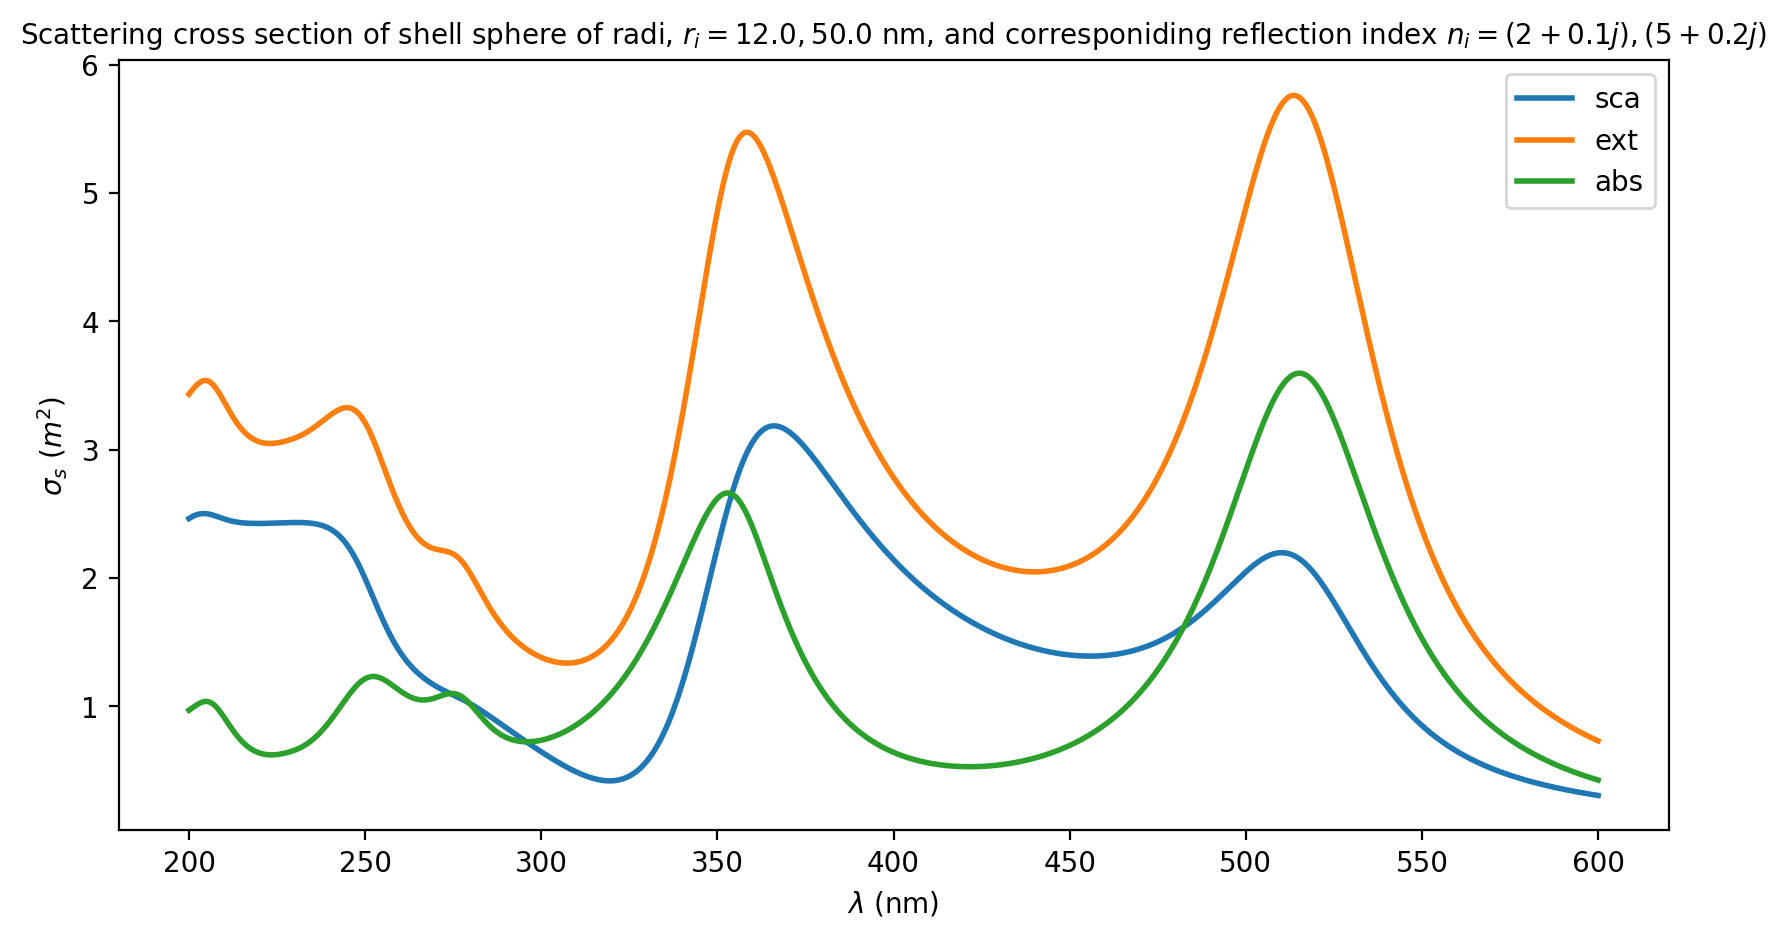

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=200)

pmd.helper.PlotCrossSection(
    ax,
    radi=(r_c, r_s),
    ns=(n_c, n_s),
    waveLengths=(2 * np.pi) / k0,
    scattering=(cross_section_sca, cross_section_ext, cross_section_abs),
    names=("sca", "ext", "abs"),
)
plt.show()

In [5]:
multipoles = pmd.farfield.cross_sections_mp(
    k0=k0,
    r_c=r_c,
    eps_c=n_c**2,
    r_s=r_s,
    eps_s=n_s**2,
    eps_env=1,
)

multipole_sca = multipoles["q_sca"]

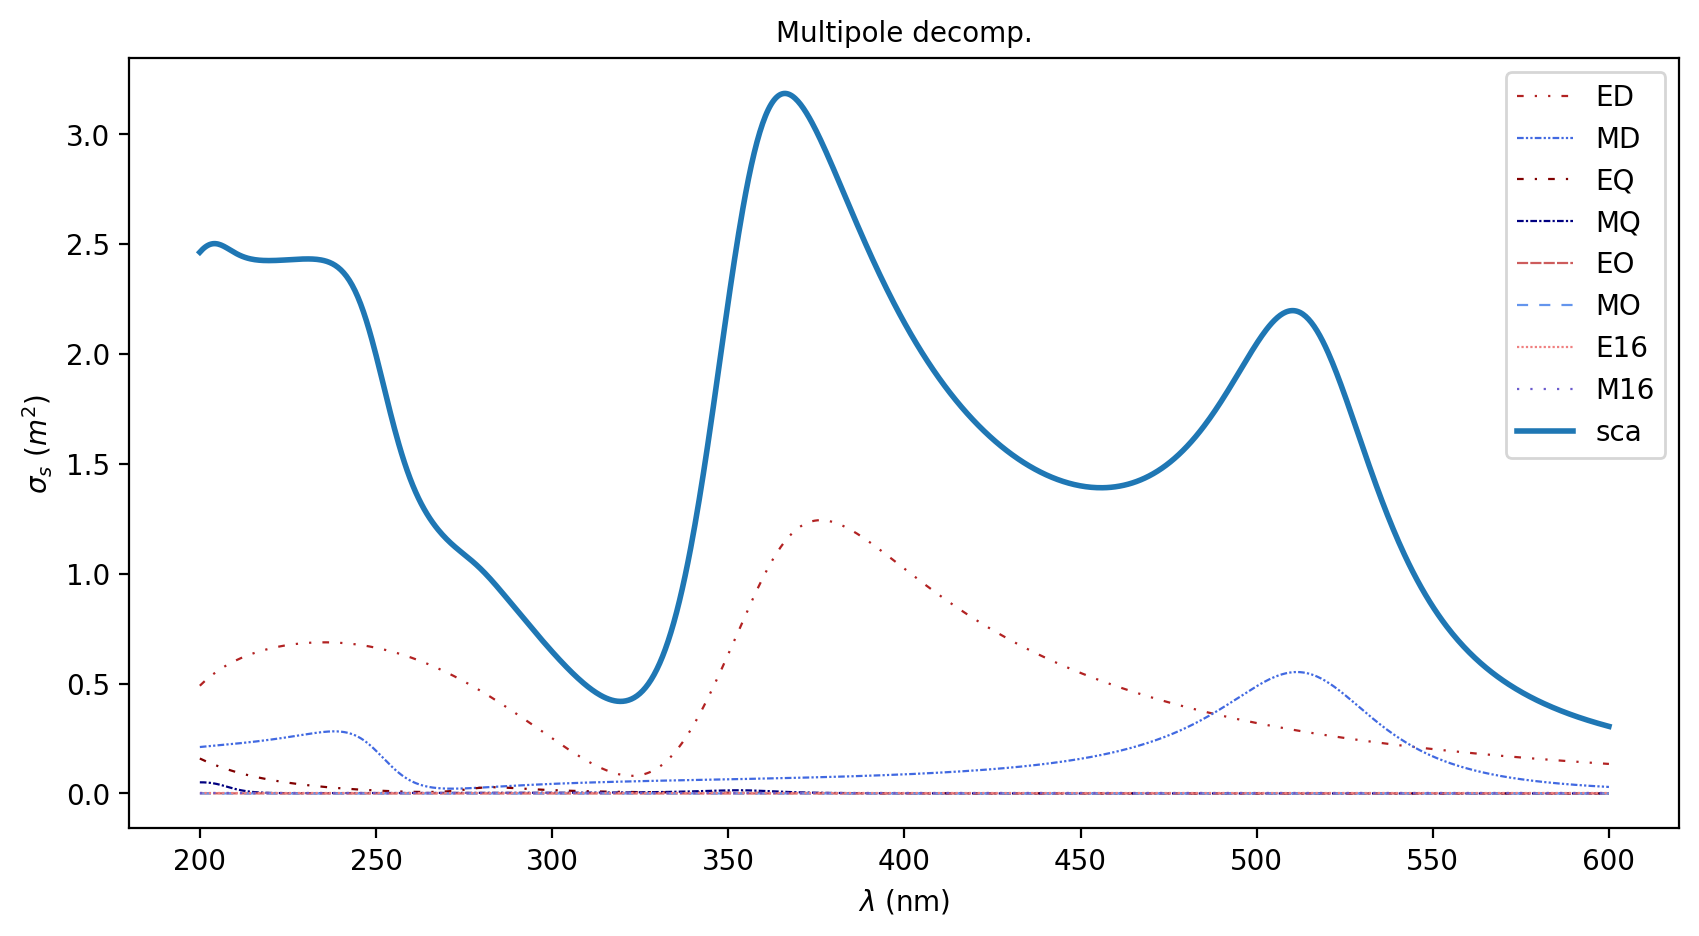

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=200)

pmd.helper.PlotCrossSection(
    ax,
    radi=(r_c, r_s),
    ns=(n_c, n_s),
    waveLengths=(2 * np.pi) / k0,
    scattering=cross_section_sca,
    names="sca",
    multipoles=multipole_sca,
    max_dis=4,
    title="Multipole decomposition.",
)
plt.show()

# Angular scattering response

In [ ]:
# Wavelegth for angular analysis
target_wavelength = 500.0  # nm

k0_single = torch.tensor(2 * torch.pi / target_wavelength)

In [7]:
ang_scattering = pmd.farfield.angular_scattering(
    k0=k0_single,
    theta=theta,
    r_c=r_c,
    eps_c=n_c**2,
    r_s=r_s,
    eps_s=n_s**2,
    eps_env=1,
)

s1 = ang_scattering["S1"]
s2 = ang_scattering["S2"]
i_per = ang_scattering["i_per"]
i_par = ang_scattering["i_par"]
i_unp = ang_scattering["i_unp"]
P = ang_scattering["P"]

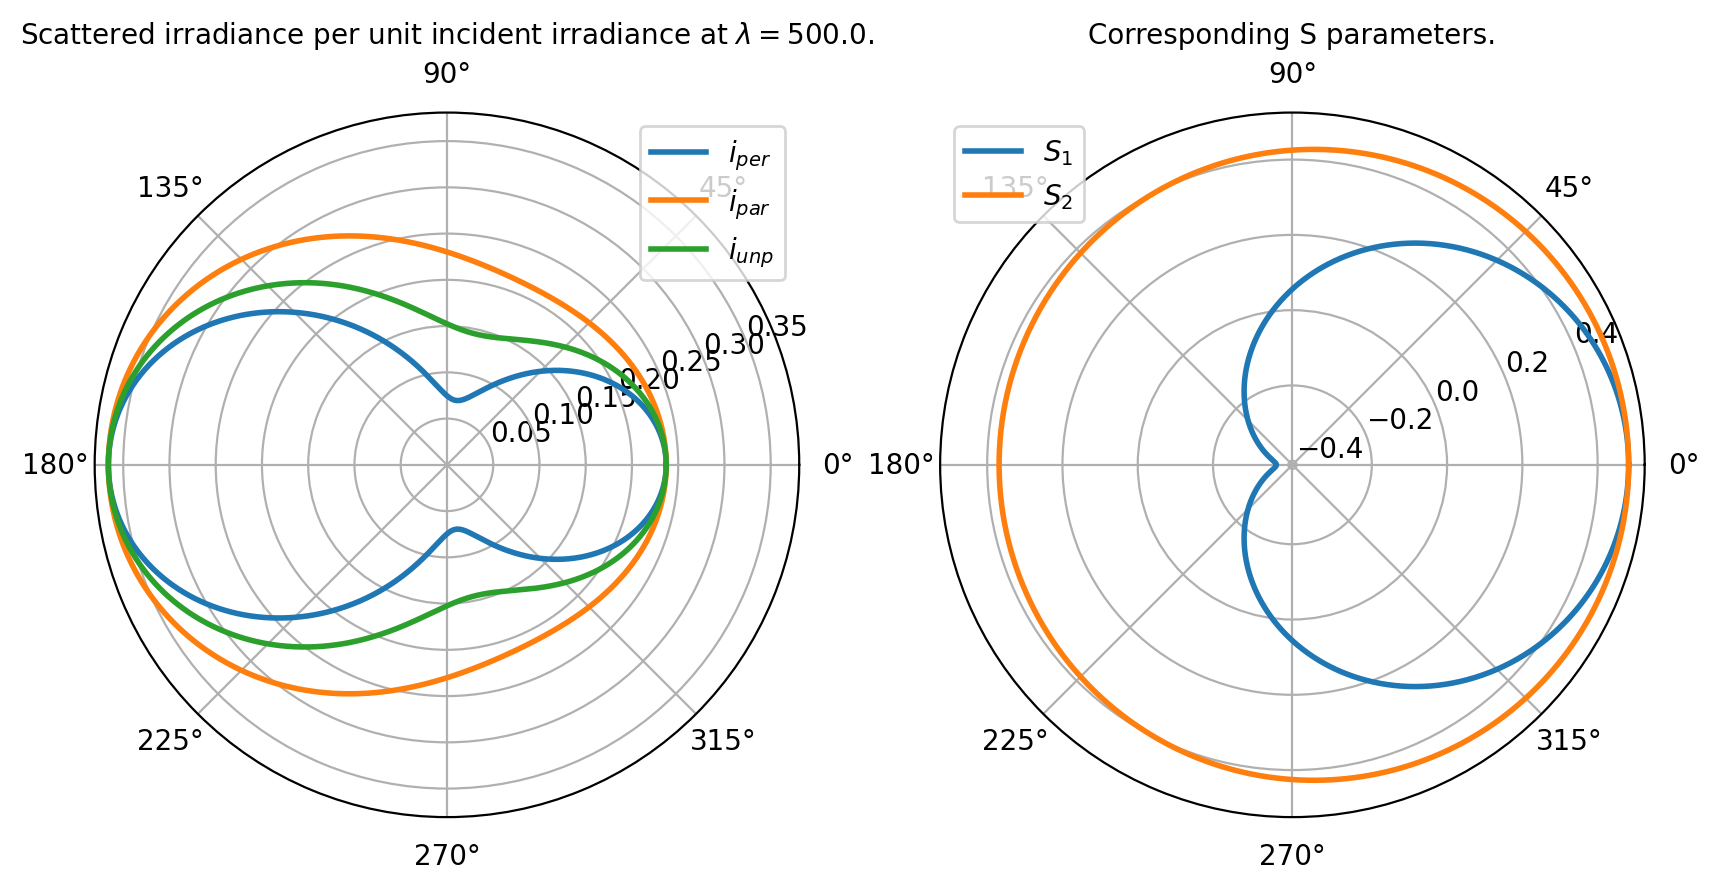

In [10]:
fig, ax = plt.subplots(
    1,
    2,
    figsize=(10, 5),
    dpi=200,
    subplot_kw={"projection": "polar"},
)

pmd.helper.PlotAngular(
    ax[0],
    radi=(r_c, r_s),
    ns=(n_c, n_s),
    wavelength=(2 * np.pi) / k0_single,
    angles=theta,
    scattering=(i_per, i_par, i_unp),
    names=("$i_{per}$", "$i_{par}$", "$i_{unp}$"),
    title=f"Scattered irradiance per unit incident irradiance at $\lambda = {target_wavelength}$.",
)

pmd.helper.PlotAngular(
    ax[1],
    radi=(r_c, r_s),
    ns=(n_c, n_s),
    wavelength=(2 * np.pi) / k0_single,
    angles=theta,
    scattering=(s1, s2),
    names=("$S_1$", "$S_2$"),
    title="Corresponding S parameters.",
)
plt.show()